# <span style="color:teal"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato per calcolare entrambi gli integrali è situato nella cartella <font face="Courier">Lecture02/Esercizio1/MC_Integrals</font>.
    </p>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def graphic(x,y,err_prog,xstring,ystring):       # grafico
    plt.figure(figsize=(10,5),tight_layout=True)
    
    plt.errorbar(x,y,yerr=err_prog)
    plt.fill_between(x, y - err_prog, y + err_prog, alpha=0.05,color='blue')
    
    x = [0, 100]
    y = [0,0]
    plt.plot(x,y,'k--')
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.grid(alpha=0.4)
    plt.show()

In [3]:
M=1000000              # Total number of throws
N=100    # Number of blocks
L=int(M/N)   

### <font face = "Tahoma" style="color:teal"><b>Punto 1.</b></font> Sampling a uniform distribution


<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Calcolo
    $$I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi}{2}x\right) dx = \int_0^1 g(x) p(x)$$
    dove $$ $$ $$g(x)= \frac{\pi}{2}\cos\left(\frac{\pi}{2}x\right)$$ e $p(x)$ distribuzione uniforme.
    </p>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Utilizzando il metodo a blocchi, la stima dell'integrale sarà data da
    $$<G>=\frac{1}{N_{blocks}} \sum_{i=1}^{N_{blocks}} \left(\frac{1}{L}\sum_{i=1}^{L} g(x_i) \right),$$
    campionando $x_i$ uniformemente in $[0,1]$, dove $L$ è il numero di steps per blocco e $N_{blocks}$ il numero di blocchi.
    </p>

<br>
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    <b>Calcolo analitico della varianza:</b>
        $$\sigma_I^2=\int_0^1 g(x)^2 p(x)-I=\int_0^1 \left[\frac{\pi}{2}\cos\left(\frac{\pi}{2}x\right)\right]^2 dx-1 \approx 0,21$$
    </p>

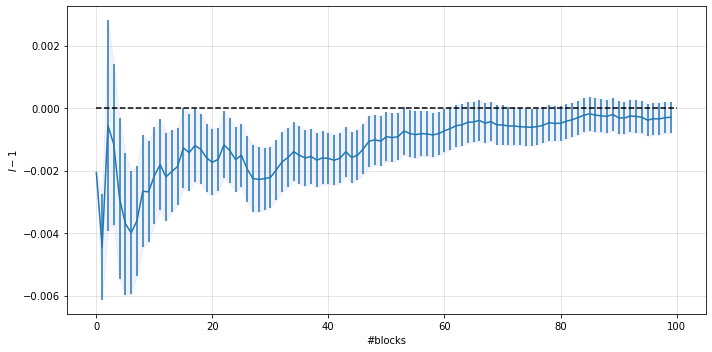

In [4]:
sum_prog_r = np.loadtxt(fname='Lecture02/Esercizio1/integral_mc.dat',usecols=2)
err_prog_r = np.loadtxt(fname='Lecture02/Esercizio1/integral_mc.dat',usecols=3)

x=np.arange(N)

graphic(x,sum_prog_r-1,err_prog_r,'#blocks','$I - 1$')

### <font face = "Tahoma" style="color:teal"><b>Punto 2.</b></font> Sampling a non uniform distribution

In [5]:
def comparison():
    points=100
    x = np.linspace(0.,1.,num=points)
    cos = np.pi/2*np.cos(np.pi/2*x)
    retta =2*(1.0-x)

    plt.plot(x,cos,label='$f(x)=\pi/2\cdot cos(\pi/2 \cdot x)$')
    plt.plot(x, retta, 'k--',label='$f(x)=2(1-x)$')
    plt.title('\nComparison\n\n', color='C0',fontsize=15)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    legend = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.,fontsize='large')
    plt.show()

#### <font face = "Tahoma"><b>Importance sampling per $I = \int_0^1 \frac{\pi}{2}\cos(\frac{\pi}{2}x) dx = 1$</b></font>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Calcolo
    $$ I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi}{2}x\right) dx $$
    con l'importance sampling.
    Quindi scrivo l'integrale come
    $$ I = \int_0^1 g(x) p(x) dx = \int_0^1 \frac{\pi}{2}\frac{\cos\left(\frac{\pi}{2}x\right)}{1-x} \cdot (1-x) dx $$
    <br> dove  
    $$ g(x)=\frac{\pi}{4}\frac{\cos\left(\frac{\pi}{2}x\right)}{1-x} $$ 
    <br>
    e dove la distribuzione di probabilità
    $$ p(x)= 2 (1-x), $$
    <br>
    è sufficientemente simile a $y=\frac{\pi}{2}\cos(\frac{\pi}{2}x)$ nell'intervallo $[0,1]$.
    </p>

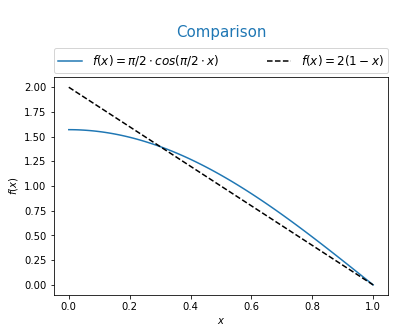

In [6]:
comparison()

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Utilizzando il metodo a blocchi, la <b>stima dell'integrale</b> sarà data da 
    $$<G>=\frac{1}{N_{blocks}} \sum_{i=1}^{N_{blocks}} \left(\frac{1}{L}\sum_{i=1}^{L} g(x_i) \right),$$ 
    dove $L$ è il numero di steps per blocco e $N_{blocks}$ il numero di blocchi; $x_i$ viene generata campionando $p(x)$ col metodo della funzione cumulativa, ovvero:
    <br>
    <i><font face="Courier" style="color:teal">(i)</font></i> la cumulativa di $ p(x)= 2 (1-x) $ è 
    $$ F(x) = \int_0 ^x p(x') dx' = 2x -x^2=:\tilde{x}$$
    <i><font face="Courier" style="color:teal">(ii)</font></i> calcolo l'inversa della cumulativa, che è
    $$ x = 1 - \sqrt{1- \tilde{x}} $$
    <i><font face="Courier" style="color:teal">(iii)</font></i> per campionare $p(x)$ genero uniformemente numeri random $\tilde{x} \in (0,1)$ e li sostituisco nell'inversa della cumulativa per ottenere la $x$ con cui integrare $g(x)$.
    </p>
<br>

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    <b>Calcolo analitico della varianza</b>:
    $$\sigma_I^2=\int_0^1 g(x)^2 p(x) dx - I = \int_0^1 \left( \frac{\pi}{4}\frac{\cos(\frac{\pi}{2}x)}{1-x} \right)^2 \cdot 2(1-x) - 1 \approx 0,016. $$
    <br> Quest'ultima è di un ordine di grandezza più piccola rispetto alla varianza trovata per l'integrale calcolato con sampling di $p(x)$ uniforme (<font face = "Tahoma" style="color:teal"><b>Punto 1.</b></font>). Poichè il numero di steps per ottenere un certo errore $\epsilon$ nei risultati è $N=\frac{\sigma_I^2}{\epsilon^2}$, allora nel caso dell'importance sampling sono sufficienti $10$ steps montecarlo in meno rispetto al calcolo del <font face = "Tahoma" style="color:teal"><b>Punto 1.</b></font> per ottenere lo stesso $\epsilon$ sulla stima dell'integrale.
    </p>

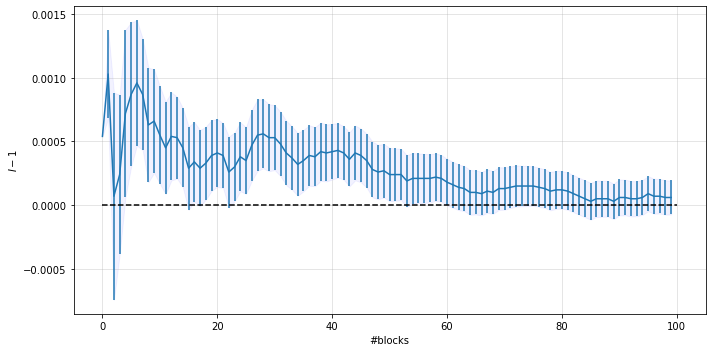

In [7]:
sum_prog_r = np.loadtxt(fname='Lecture02/Esercizio1/integral_importance.dat',usecols=2)
err_prog_r = np.loadtxt(fname='Lecture02/Esercizio1/integral_importance.dat',usecols=3)

x=np.arange(N)

graphic(x,sum_prog_r-1,err_prog_r,'#blocks','$I - 1$')

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Il codice usato per calcolare entrambi i <b>Random Walk</b> è situato nella cartella <font face="Courier">Lecture02/Esercizio2</face>.
    </p>

In [8]:
def graphic_FIT(x,y,errore):
    fig, ax = plt.subplots(figsize=(12,5))
    ax.set_title('\nComparison between $\sqrt{<|r|>^2}$ as function of i and $f(N) = k \sqrt{N}$',color='C0',fontsize=15)
    ax.errorbar(x,y,yerr=errore,label='$y=\sqrt{<|r_{step}|>^2}$')
        
    plt.xlabel('step')
    plt.ylabel('$f(x)$')
    k_rad_N = np.zeros(N)         # y = k sqrt(N)
    for l in range(N):
        k_rad_N[l] = 1.*math.sqrt(l)
    ax.plot(x,k_rad_N,'k--',label='$y = 1 \sqrt{N}$',color='black',alpha=0.4)
    legend = ax.legend(loc='upper left', shadow=False,framealpha=1., fontsize='x-large')
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
    plt.grid(alpha=0.4)
    plt.show()

In [9]:
def graphic_zoom(x,y,errore):
    zoom=np.zeros(5)
    err_zoom=np.zeros(5)
    X=np.arange(5)

    for i in range(5):
        zoom[i]=y[i+90]
        err_zoom[i]=errore[i+90]
        X[i]=x[i+90]
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.errorbar(X,zoom,yerr=err_zoom,label='$y=\sqrt{<|r_{step}|>^2}$')
    # anzichè usare errorbar, per mostrare l'incertezza uso fill_between =) 
    ax.fill_between(X, zoom - err_zoom, zoom + err_zoom, alpha=0.1,color='blue', label='uncertain')
    
    plt.xlabel('step')
    plt.ylabel('$\sqrt{<|r_{step}|>^2}$')
    ax.set_title('\nZooming a part of the graph to display the error bars',color='C0',fontsize=15)
    legend = ax.legend(loc='lower right',shadow=False,framealpha=1., fontsize='x-large')
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
    plt.grid(alpha=0.4)
    plt.show()

### <font face = "Tahoma" style="color:teal"><b>Punto 1.</b></font> RW on a cubic lattice

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Ad ogni step genero uniformemente un numero $s \in \left[0,1\right)$. Per generare un RW discreto in un reticolo 3D, divido l'intervallo $\left[0,1\right)$ in 6 sottointervalli di lunghezza equivalente.
    Se $s \in [0,1/6)$ il camminatore si sposta di $+1$ in direzione $\hat{x}$; se $s \in [1/6,2/6)$ il camminatore si sposta di $-1$ in direzione $\hat{x}$; se $s \in [2/6,3/6)$ il camminatore si sposta di $+1$ in direzione $\hat{y}$; e così via.
    Quindi il camminatore può muoversi equiprobabilmente in ognuna delle direzioni, sia avanti che indietro.<br> <br>
    Lancio una simulazione di un totale di $M=10^6$ steps, utilizzando il metodo a blocchi e simulando per ogni blocco un random walk da $10^2$ steps. <br>
    Calcolo dunque $\sqrt{<|\vec{r}_N|^2>}$ in funzione dello step $i \in [0,10^2]$; quindi a step i-esimo fissato ho
    $$ \sqrt{<|\vec{r}_i|^2>} = \sqrt{\sum_{j=1}^{N_{blocks}} |\vec{r}_{i,j}|^2} .$$ 
    </p>

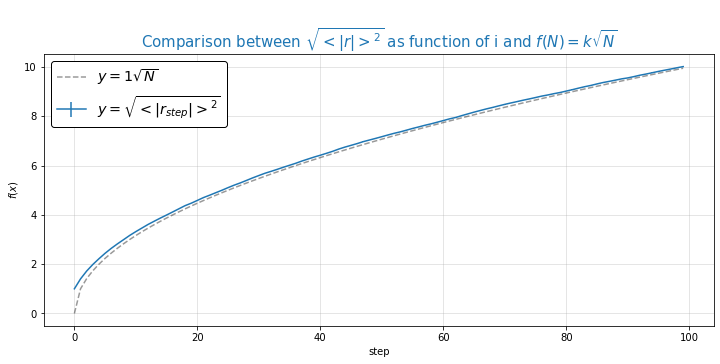

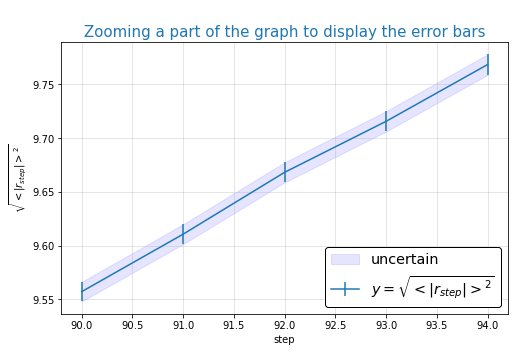

In [10]:
RW_d = np.loadtxt(fname='Lecture02/Esercizio2/RW_discrete.dat',usecols=1)
err_d = np.loadtxt(fname='Lecture02/Esercizio2/RW_discrete.dat',usecols=2)

N=100  # number of steps per block
x=np.arange(N)

graphic_FIT(x,RW_d,err_d)
graphic_zoom(x,RW_d,err_d)

### <font face = "Tahoma" style="color:teal"><b>Punto 2.</b></font> RW in the continuum
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Mi metto inizialmente in coordinate sferiche.
    A ogni step (discreto) faccio spostare randomicamente il camminatore di una distanza $r=1$, campionando con distribuzione uniforme (e continua) $\theta \in \left[0, \pi \right]$, $\phi \in \left[0, 2\pi \right]$. Faccio poi una trasformazione da coordinate sferiche a cartesiane per calcolare la distanza del camminatore dall'origine. <br>
    Lancio anche in questo caso una simulazione con un totale di $M=10^6$ steps, utilizzando il metodo a blocchi e simulando per ogni blocco un random walk da $10^2$ steps. <br>
    Calcolo dunque $\sqrt{<|\vec{r}_N|^2>}$ in funzione dello step $i \in [0,10^2]$; quindi a step i-esimo fissato
    $$ \sqrt{<|\vec{r}_i|^2>} = \sqrt{\frac{1}{N_{blocks}}\sum_{j=1}^{N_{blocks}} |\vec{r}_{i,j}|^2} .$$ 
    </p>

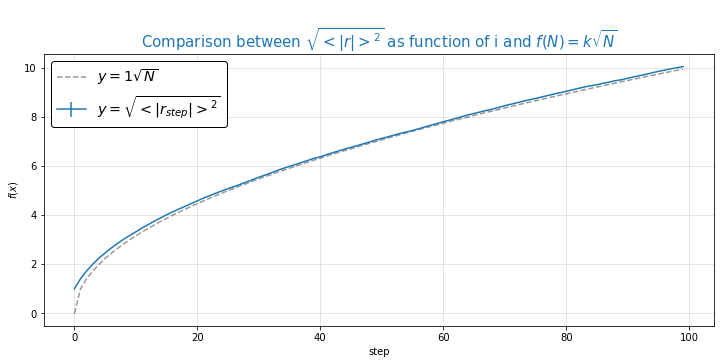

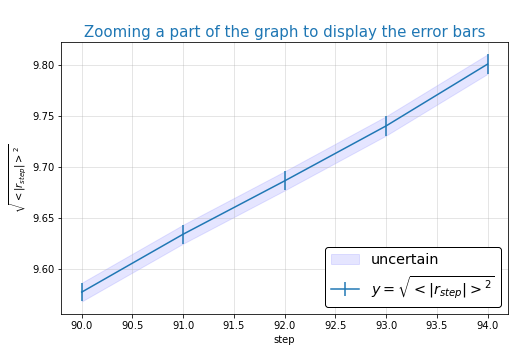

In [11]:
RW_c = np.loadtxt(fname='Lecture02/Esercizio2/RW_continuum.dat',usecols=1)
err_c = np.loadtxt(fname='Lecture02/Esercizio2/RW_continuum.dat',usecols=2)

N=100  # number of steps per block
x=np.arange(N)

graphic_FIT(x,RW_c,err_c)
graphic_zoom(x,RW_c,err_c)

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Sia la curva del RW discreto sia quella del RW continuo fittano con la funzione $y=\sqrt{N_{steps}}$. Questo implica che il valore quadratico medio dello spostamento cresce linearmente col numero di steps (cioè col tempo) $<|\vec{r}_{i_{step}}|^2>=i_{step}$.
    <br>
    Il comportamento di entrambi i sistemi è pertanto diffusivo e il nesso tra l'equazione $<|\vec{r}_{i_{step}}|^2>=i_{step}$ e l'equazione di diffusione è il Teorema del Limite Centrale.
    </p>